## Module 3D
## Tutorial 3 covers generating simple organelle models, creating reports from them, and comparing them.
## Module 3D creates a synthetic cell using one of the distributed models 
## This module takes about 20 minutes to run in order to generate all of the individual organelles.

In [1]:
from cellorganizer.tools import slml2img
import os
from IPython.core.display import display, HTML, Image

folder_name = 'Module3D'
model_name =  'tfr' #Gaussian object model of endosomes (marked by transferrin receptor)
model_file = "/home/murphylab/cellorganizer/local/models/" +  model_name + ".mat"

topdir = "/home/murphylab/cellorganizer/local/results"
outputdir = topdir + "/" + folder_name
if not os.path.exists(topdir):
    os.makedirs(topdir)
os.chdir(topdir)
if not os.path.exists(outputdir):
    os.makedirs(outputdir)
os.chdir(outputdir)
if not os.path.exists(model_name):
    os.makedirs(model_name)
os.chdir(model_name)

options = {}

answer = slml2img([model_file], options)

In [2]:
from skimage import io
import numpy as np
img0 = np.transpose(io.imread(os.getcwd() + '/demo/cell1/vesicle1.tif'), (1, 2, 0))
img1 = np.transpose(io.imread(os.getcwd() + '/demo/cell1/nucleus.tif'), (1, 2, 0))
img2 = np.transpose(io.imread(os.getcwd() + '/demo/cell1/cell.tif'), (1, 2, 0))
print(img0.shape)
ishape = img0.shape
rgb=np.empty([ishape[0],ishape[1],3,ishape[2]],dtype=int)
print(np.amax(img0)) #max for all should be 255 (8-bit)
print(np.amax(img1))
print(np.amax(img2))
rgb[:,:,0,:]=img0
rgb[:,:,1,:]=img1
rgb[:,:,2,:]=img2
print(rgb.shape)

(469, 779, 10)
255
255
255
(469, 779, 3, 10)


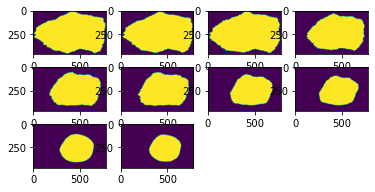

In [3]:
import matplotlib.pyplot as plt
import math
#Plot the individual xy slices of the 3D image
fig = plt.figure()
panels = math.ceil(math.sqrt(img2.shape[2]))
for i in range(img2.shape[2]):
    plt.subplot(panels,panels,i+1)
    plt.imshow(img2[:,:,i])
plt.show()

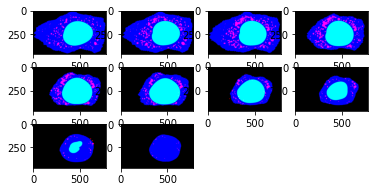

In [4]:
#Plot vesicles in red, nucleus in green, cell in blue
fig = plt.figure()
panels = math.ceil(math.sqrt(rgb.shape[3]))
for i in range(rgb.shape[3]):
    plt.subplot(panels,panels,i+1)
    plt.imshow(rgb[:,:,:,i])
plt.show()